In [1]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_excel('base1.xlsx', sheet_name='base')


df.rename(columns={'Дата': 'DATA', 'Счет Дт': 'SD', 'Субконто1 Дт': 'SKD1', 'Субконто2 Дт': 'SKD2', 'Субконто3 Дт': 'SKD3', 'Счет Кт': 'SK', 
        'Субконто1 Кт': 'SKK1', 'Субконто2 Кт': 'SKK2', 'Субконто3 Кт': 'SKK3', 'Сумма': 'SUMMA'}, inplace=True)

df = df[(df['SK']=='90.01.1') | (df['SD']=='90.02.1')]

df['ST'] = (df['SUMMA']/1000).round(2)
df['DATA'] = pd.to_datetime(df['DATA'], dayfirst=True)
df['Год']=pd.DatetimeIndex(df['DATA']).year.astype('object')
df['Месяц'] = pd.DatetimeIndex(df['DATA']).month.astype('object')
df['День'] = pd.DatetimeIndex(df['DATA']).day.astype('object')
df['Квартал'] = pd.DatetimeIndex(df['DATA']).quarter.astype('object')
df['YM'] = df['DATA'].dt.to_period('M')

df = df[df['Год']>=2021]

df['Статья'] = ''
df.loc[df['SK']=='90.01.1', 'Статья'] = 'Продажи'
df.loc[df['SD']=='90.02.1', 'Статья'] = 'Себестоимость'

df['Номенклатура'] = ''
df.loc[df['SK']=='90.01.1', 'Номенклатура'] = df['SKK3']
df.loc[((df['SD']=='90.02.1') & (df['SK']=='41.01')), 'Номенклатура'] = df['SKK1']
df.loc[((df['SD']=='90.02.1') & (df['SK']=='45.01')), 'Номенклатура'] = df['SKK2']

df['ДС'] = 0
df.loc[df['SK']=='90.01.1', 'ДС'] = df['ST'] /1.2
df.loc[df['SD']=='90.02.1', 'ДС'] = df['ST']*-1

df['Продажи'] = 0
df.loc[df['SK']=='90.01.1', 'Продажи'] = df['ST'] /1.2

df['Себестоимость'] = 0
df.loc[df['SD']=='90.02.1', 'Себестоимость'] = df['ST']*-1

# по годам
pt00 = pd.pivot_table(df, index=['Статья'], values=['ДС'], columns=['Год'], aggfunc='sum', fill_value='', margins=False).round(2)
pt00 = pt00['ДС']
pt00 = pt00.transpose()
pt00['Марж.прибыль'] = pt00['Продажи'] + pt00['Себестоимость']
pt00['Маржа_пр'] = (pt00['Марж.прибыль']/pt00['Продажи']*100).round(1)
# вот так исправляю формат числа:
# pt00 = pt00.style.format(precision=1, thousands=" ", decimal=",")


C:\Users\smole\AppData\Local\Temp\ipykernel_25256\1046133581.py:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[17.41666667 11.58333333 13.325      ... 10.23333333 15.675
  0.71666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SK']=='90.01.1', 'ДС'] = df['ST'] /1.2
C:\Users\smole\AppData\Local\Temp\ipykernel_25256\1046133581.py:33: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[17.41666667 11.58333333 13.325      ... 10.23333333 15.675
  0.71666667]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['SK']=='90.01.1', 'Продажи'] = df['ST'] /1.2
C:\Users\smole\AppData\Local\Temp\ipykernel_25256\1046133581.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future ve

In [19]:
pt00

Статья,Продажи,Себестоимость,Марж.прибыль,Маржа_пр
Год,,,,
2021,180581.85,-129351.87,51229.98,28.4
2022,138935.67,-82114.50,56821.17,40.9
2023,91520.93,-52118.22,39402.71,43.1


<Axes: xlabel='Год'>

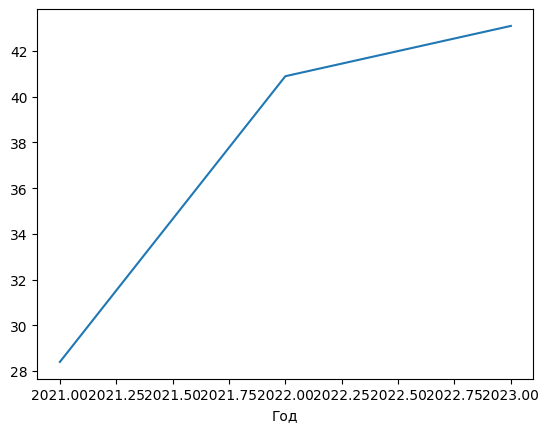

In [21]:
pt00.loc[:, "Маржа_пр"].plot()

In [ ]:
pt01 = pt00.style.format(precision=1, thousands=" ", decimal=",")

In [ ]:
pt01

Статья,Продажи,Себестоимость,Марж.прибыль
Год,,,
2021,"180 581,9","-129 351,9","51 230,0"
2022,"138 935,7","-82 114,5","56 821,2"
2023,"91 520,9","-52 118,2","39 402,7"


In [22]:
pt1 = pd.pivot_table(df, index=['Статья'], values=['ДС'], columns=['Год', 'Месяц'], aggfunc='sum', fill_value='', margins=False).round(2)
pt1 = pt1['ДС']
pt1 = pt1.transpose()
pt1['Марж.прибыль'] = pt1['Продажи'] + pt1['Себестоимость']
pt1['Маржа_%'] = (pt1['Марж.прибыль']/pt1['Продажи'])*100

pt1

Статья       Продажи  Себестоимость  Марж.прибыль    Маржа_%
Год  Месяц                                                  
2021 1       4359.73       -3099.21       1260.52  28.912800
     2       4715.93       -2929.78       1786.15  37.874820
     3      18806.48      -13598.91       5207.57  27.690296
     4      15606.04      -11753.98       3852.06  24.683136
     5      22704.43      -16295.36       6409.07  28.228280
     6       4466.78       -3399.83       1066.95  23.886334
     7       7522.26       -5744.54       1777.72  23.632791
     8      15538.91      -11259.57       4279.34  27.539512
     9       9982.02       -7080.45       2901.57  29.067964
     10     21107.48      -16136.20       4971.28  23.552219
     11     17526.23      -12713.84       4812.39  27.458215
     12     38245.56      -25340.20      12905.36  33.743420
2022 1       6898.70       -4643.99       2254.71  32.683114
     2       9193.99       -6561.85       2632.14  28.628920
     3      12686.58       -8421.97       4264.61  33.615127
     4      20121.88      -11556.45       8565.43  42.567742
     5      14946.99       -7813.73       7133.26  47.723722
     6       8179.76       -4396.19       3783.57  46.255269
     7       9625.70       -5635.81       3989.89  41.450388
     8       7064.48       -3757.42       3307.06  46.812504
     9       8555.83       -4627.66       3928.17  45.912203
     10     19661.79      -13547.31       6114.48  31.098288
     11      9898.93       -4716.68       5182.25  52.351618
     12     12101.04       -6435.44       5665.60  46.819116
2023 1      15245.58       -7908.52       7337.06  48.125817
     2      18717.43      -10170.83       8546.60  45.661183
     3      23490.02      -16173.10       7316.92  31.149058
     4      30586.43      -16435.06      14151.37  46.266825
     5       3481.48       -1430.71       2050.77  58.905121

In [23]:
tabl = pt1.loc[:, "Марж.прибыль"]

tabl

Год   Месяц
2021  1         1260.52
      2         1786.15
      3         5207.57
      4         3852.06
      5         6409.07
      6         1066.95
      7         1777.72
      8         4279.34
      9         2901.57
      10        4971.28
      11        4812.39
      12       12905.36
2022  1         2254.71
      2         2632.14
      3         4264.61
      4         8565.43
      5         7133.26
      6         3783.57
      7         3989.89
      8         3307.06
      9         3928.17
      10        6114.48
      11        5182.25
      12        5665.60
2023  1         7337.06
      2         8546.60
      3         7316.92
      4        14151.37
      5         2050.77
Name: Марж.прибыль, dtype: float64

In [24]:
tabl.info()

<class 'pandas.core.series.Series'>
MultiIndex: 29 entries, (np.int64(2021), np.int64(1)) to (np.int64(2023), np.int64(5))
Series name: Марж.прибыль
Non-Null Count  Dtype  
--------------  -----  
29 non-null     float64
dtypes: float64(1)
memory usage: 542.0 bytes


<Axes: xlabel='Год,Месяц'>

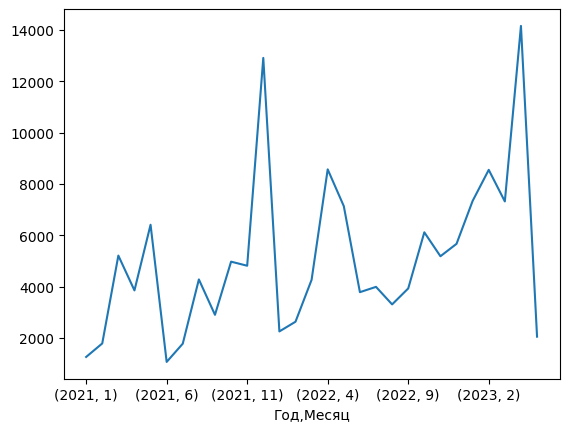

In [26]:
tabl.plot(kind="line")